In [1]:
# importing libraries
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

In [2]:
# reading data
automobile_df = pd.read_csv('datasets/auto-mpg.csv')
automobile_df.sample(5)
# dataset is about miles per gallon of different cars based on different features

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
243,21.5,3,80.0,110,2720,13.5,77,3,mazda rx-4
279,29.5,4,98.0,68,2135,16.6,78,3,honda accord lx
108,20.0,4,97.0,88,2279,19.0,73,3,toyota carina
167,29.0,4,97.0,75,2171,16.0,75,3,toyota corolla
190,14.5,8,351.0,152,4215,12.8,76,1,ford gran torino


In [3]:
# getting columns
print(automobile_df.columns)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')


In [4]:
# getting shape
print('Rows and Columns', automobile_df.shape)

Rows and Columns (398, 9)


In [5]:
# replacing missing data with nan
automobile_df = automobile_df.replace('?', np.nan)

In [6]:
# cleaning data
automobile_df = automobile_df.dropna()

In [7]:
# getting shape
print('Rows and Columns', automobile_df.shape)
# after cleaning rows decreased to 392 from 398

Rows and Columns (392, 9)


In [8]:
# dropping unused columns records
automobile_df.drop(['origin', 'car name'], axis=1, inplace=True)

In [9]:
# showing data
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
236,25.5,4,140.0,89,2755,15.8,77
79,26.0,4,96.0,69,2189,18.0,72
40,14.0,8,351.0,153,4154,13.5,71
51,30.0,4,79.0,70,2074,19.5,71
290,15.5,8,351.0,142,4054,14.3,79


In [10]:
# converting model year
automobile_df['model year'] = '19' + automobile_df['model year'].astype(str)
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
179,22.0,4,121.0,98,2945,14.5,1975
66,17.0,8,304.0,150,3672,11.5,1972
212,16.5,8,350.0,180,4380,12.1,1976
24,21.0,6,199.0,90,2648,15.0,1970
269,30.9,4,105.0,75,2230,14.5,1978


In [11]:
# calculating age of the car and creating new column age
automobile_df['age'] = dt.datetime.now().year - pd.to_numeric(automobile_df['model year'])

In [12]:
# showing data
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,age
113,21.0,6,155.0,107,2472,14.0,1973,46
185,26.0,4,98.0,79,2255,17.7,1976,43
81,28.0,4,97.0,92,2288,17.0,1972,47
267,27.5,4,134.0,95,2560,14.2,1978,41
193,24.0,6,200.0,81,3012,17.6,1976,43


In [13]:
# dropping model year column
automobile_df.drop(['model year'], axis=1, inplace=True)

In [14]:
# showing data
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
262,19.2,8,305.0,145,3425,13.2,41
364,26.6,8,350.0,105,3725,19.0,38
193,24.0,6,200.0,81,3012,17.6,43
257,19.4,6,232.0,90,3210,17.2,41
195,29.0,4,85.0,52,2035,22.2,43


In [15]:
# checking datatypes it should be numeric
automobile_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
age               int64
dtype: object

In [16]:
# changing horsepower to numeric data
automobile_df['horsepower'] = pd.to_numeric(automobile_df['horsepower'], errors='coerce')

In [17]:
# checking datatypes it should be numeric
automobile_df.dtypes
# all in int64 and float64

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
age               int64
dtype: object

In [18]:
# describing statistical values of data 
automobile_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,43.020408
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,37.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,40.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,43.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,46.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,49.000000


Text(0, 0.5, 'Miles Per Gallon')

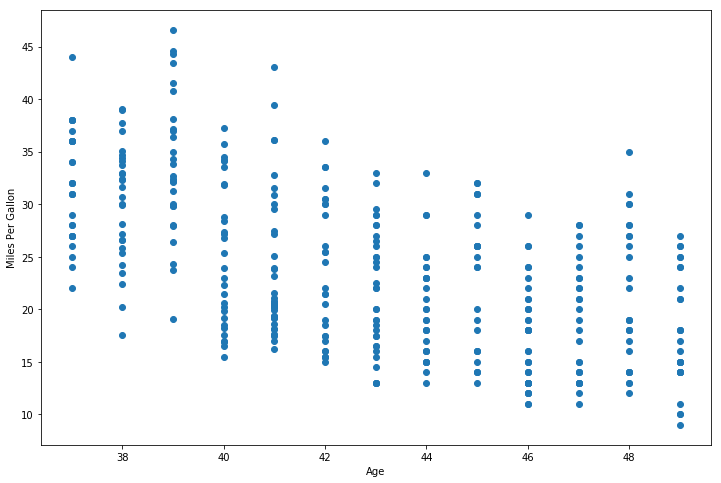

In [19]:
# visualizing the data on age vs mpg
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(automobile_df['age'], automobile_df['mpg'])
plt.xlabel('Age')
plt.ylabel('Miles Per Gallon')

Text(0, 0.5, 'Miles Per Gallon')

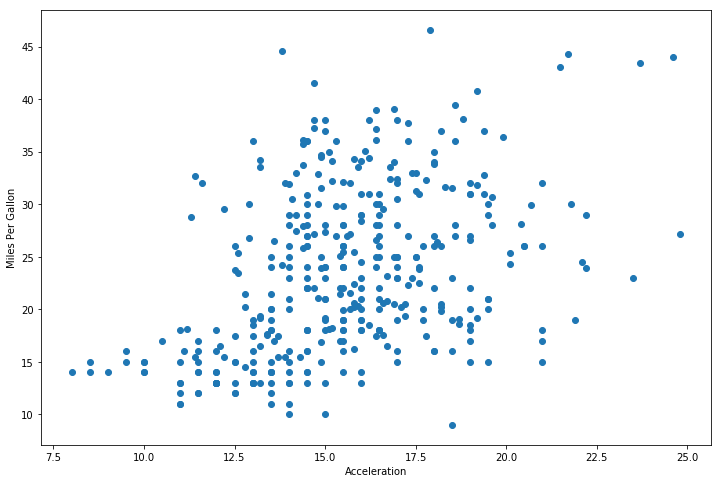

In [20]:
# visualizing the data on acceleration vs mpg
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(automobile_df['acceleration'], automobile_df['mpg'])
plt.xlabel('Acceleration')
plt.ylabel('Miles Per Gallon')

Text(0, 0.5, 'Miles Per Gallon')

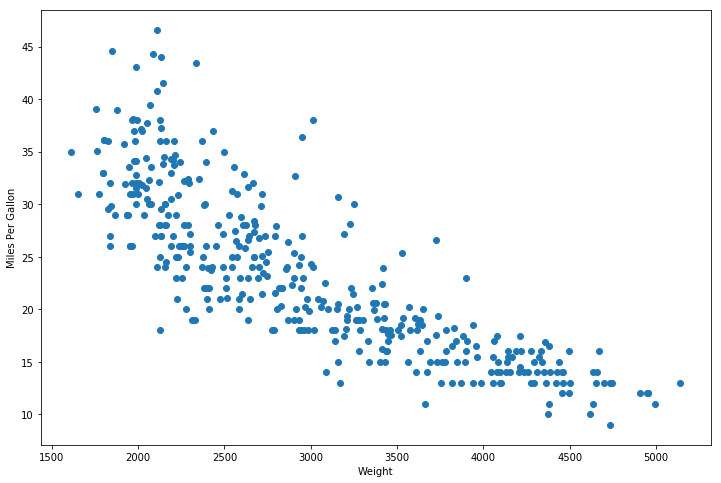

In [21]:
# visualizing the data on weight vs mpg
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(automobile_df['weight'], automobile_df['mpg'])
plt.xlabel('Weight')
plt.ylabel('Miles Per Gallon')

Text(0, 0.5, 'Miles Per Gallon')

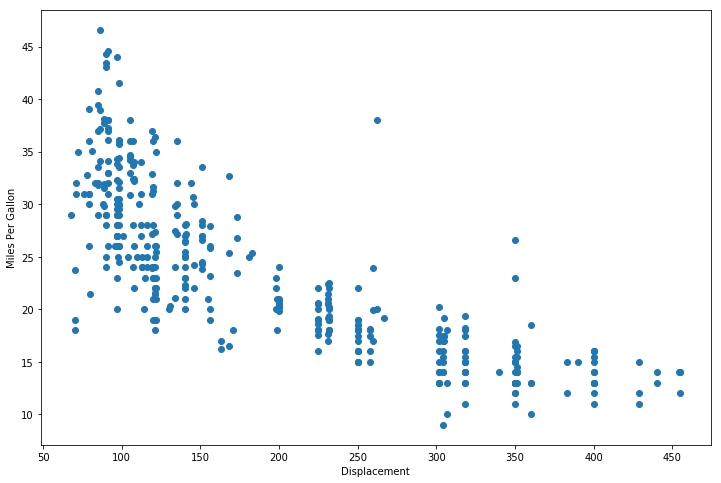

In [22]:
# visualizing the data on displacement vs mpg
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(automobile_df['displacement'], automobile_df['mpg'])
plt.xlabel('Displacement')
plt.ylabel('Miles Per Gallon')

Text(0, 0.5, 'Miles Per Gallon')

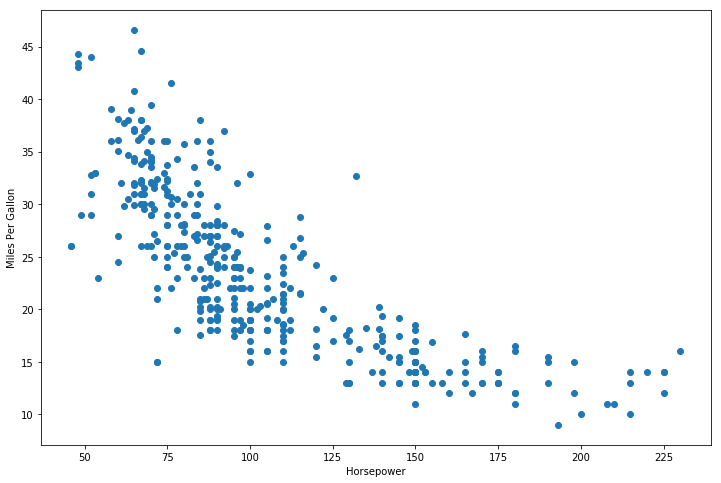

In [23]:
# visualizing the data on horsepower vs mpg
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(automobile_df['horsepower'], automobile_df['mpg'])
plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon')

Text(0, 0.5, 'Miles Per Gallon')

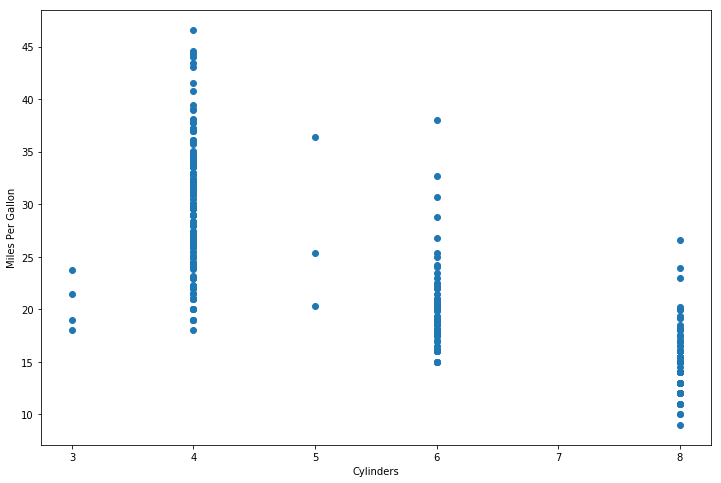

In [24]:
# visualizing the data on cylinders vs mpg
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(automobile_df['cylinders'], automobile_df['mpg'])
plt.xlabel('Cylinders')
plt.ylabel('Miles Per Gallon')

In [25]:
# getting pairwise relation among the data (-1 to 1)
automobile_corr = automobile_df.corr()
automobile_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.290316
age,-0.580541,0.345647,0.369855,0.416361,0.309120,-0.290316,1.000000


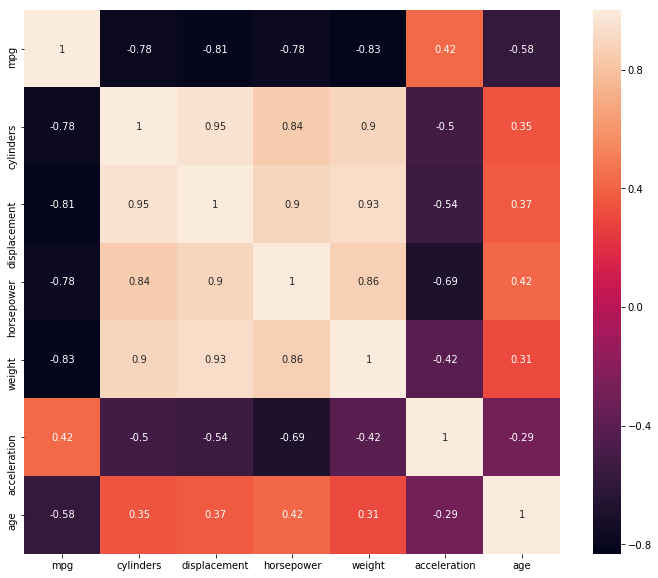

In [26]:
# visualizing using heatmap
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(automobile_corr, annot=True)

In [27]:
# shuffling data 
automobile_df = automobile_df.sample(frac=1).reset_index(drop=True)
automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,15.5,8,350.0,170,4165,11.4,42
1,24.3,4,151.0,90,3003,20.1,39
2,27.0,4,101.0,83,2202,15.3,43
3,26.0,4,108.0,93,2391,15.5,45
4,28.0,4,97.0,75,2155,16.4,43


In [28]:
# saving the new processed data
automobile_df.to_csv('datasets/auto-mgp-processed.csv', index=False)

In [29]:
# seeing files
!ls datasets

auto-mgp-processed.csv	auto-mpg.csv  housing.csv


In [36]:
# loading data
automobile_data = pd.read_csv('datasets/auto-mgp-processed.csv')
automobile_data.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
45,38.0,6,262.0,85,3015,17.0,37
157,44.0,4,97.0,52,2130,24.6,37
19,15.0,8,304.0,150,3892,12.5,47
178,31.0,4,112.0,85,2575,16.2,37
15,18.0,6,199.0,97,2774,15.5,49


In [37]:
# storing data in other dataframe for training it
X = automobile_data.drop('mpg', axis=1)
Y = automobile_data['mpg']

In [43]:
# getting columns
print('Columns in X :', X.columns)

Columns in X : Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'age'],
      dtype='object')


In [44]:
# spliting data into test and train dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [45]:
# getting shape of training and test data
x_train.shape, x_test.shape

((313, 6), (79, 6))

In [46]:
# getting shape of training and test data
y_train.shape, y_test.shape

((313,), (79,))

In [47]:
# selecting training model and fitting data into it
from sklearn.linear_model import LinearRegression
# invoking method and fitting the data in model for training
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [48]:
# getting R-Sqaure that is how best the line fit into the data
print('Training R-Score :', linear_model.score(x_train, y_train))

Training R-Score : 0.7875560666949705


In [49]:
# assigning columns name to predictors for making prediction
predictors = x_train.columns
predictors

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'age'],
      dtype='object')

In [50]:
# getting coefficient of the data predictors
predictors_coef = pd.Series(linear_model.coef_, predictors).sort_values()
print(predictors_coef)

age            -0.746946
cylinders      -0.329432
weight         -0.006523
horsepower     -0.004894
displacement    0.005972
acceleration    0.051873
dtype: float64


In [51]:
# predicting the y using x_test
y_pred = linear_model.predict(x_test)

In [52]:
# converting into dataframe
df_actual_predict = pd.DataFrame({'predicted':y_pred, 'actual':y_test})
df_actual_predict.head(10)

,predicted,actual
40,32.345851,31.9
245,31.514961,32.8
130,31.782680,34.0
185,11.391716,16.0
201,21.657372,22.0
149,26.624090,23.2
294,24.419782,25.0
183,14.956337,14.5
138,8.411989,12.0
211,30.872742,39.4


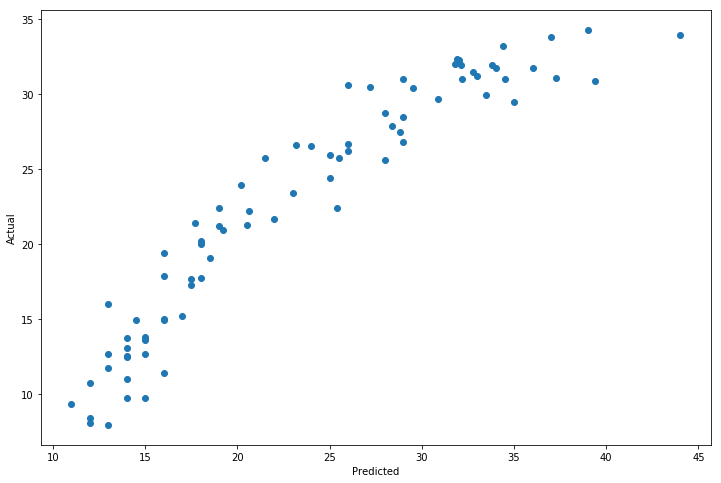

In [55]:
# visualizing data
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(y_test, y_pred)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()